In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv(
    "assignment_2_train.csv"
)

df_test = pd.read_csv(
    "assignment_2_test.csv"
)

print("gf_train.shape = {} rows, {} cols".format(*df_train.shape))
print("df_test.shape = {} rows, {} cols".format(*df_test.shape))
df_train.head(n=2)

gf_train.shape = 180000 rows, 394 cols
df_test.shape = 100001 rows, 394 cols


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

# Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 541.1+ MB


In [5]:
pd.options.display.max_rows = 393

In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionID,180000.0,3.077000e+06,5.196167e+04,2987000.000,3.032000e+06,3.077000e+06,3.121999e+06,3.166999e+06
isFraud,180000.0,2.856111e-02,1.665699e-01,0.000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
TransactionDT,180000.0,1.909818e+06,1.039029e+06,86400.000,1.091681e+06,1.884075e+06,2.693196e+06,3.958317e+06
TransactionAmt,180000.0,1.295142e+02,2.065150e+02,0.292,4.400000e+01,7.500000e+01,1.250000e+02,5.278950e+03
card1,180000.0,9.860226e+03,4.910778e+03,1001.000,6.019000e+03,9.633000e+03,1.418200e+04,1.839600e+04
card2,177389.0,3.683269e+02,1.589528e+02,100.000,2.150000e+02,3.750000e+02,5.140000e+02,6.000000e+02
card3,179997.0,1.534104e+02,1.152948e+01,100.000,1.500000e+02,1.500000e+02,1.500000e+02,2.310000e+02
card5,179047.0,2.003631e+02,4.058553e+01,100.000,1.660000e+02,2.260000e+02,2.260000e+02,2.370000e+02
addr1,160567.0,2.911604e+02,1.022504e+02,100.000,2.040000e+02,2.990000e+02,3.300000e+02,5.400000e+02
addr2,160567.0,8.655990e+01,3.958070e+00,10.000,8.700000e+01,8.700000e+01,8.700000e+01,1.020000e+02


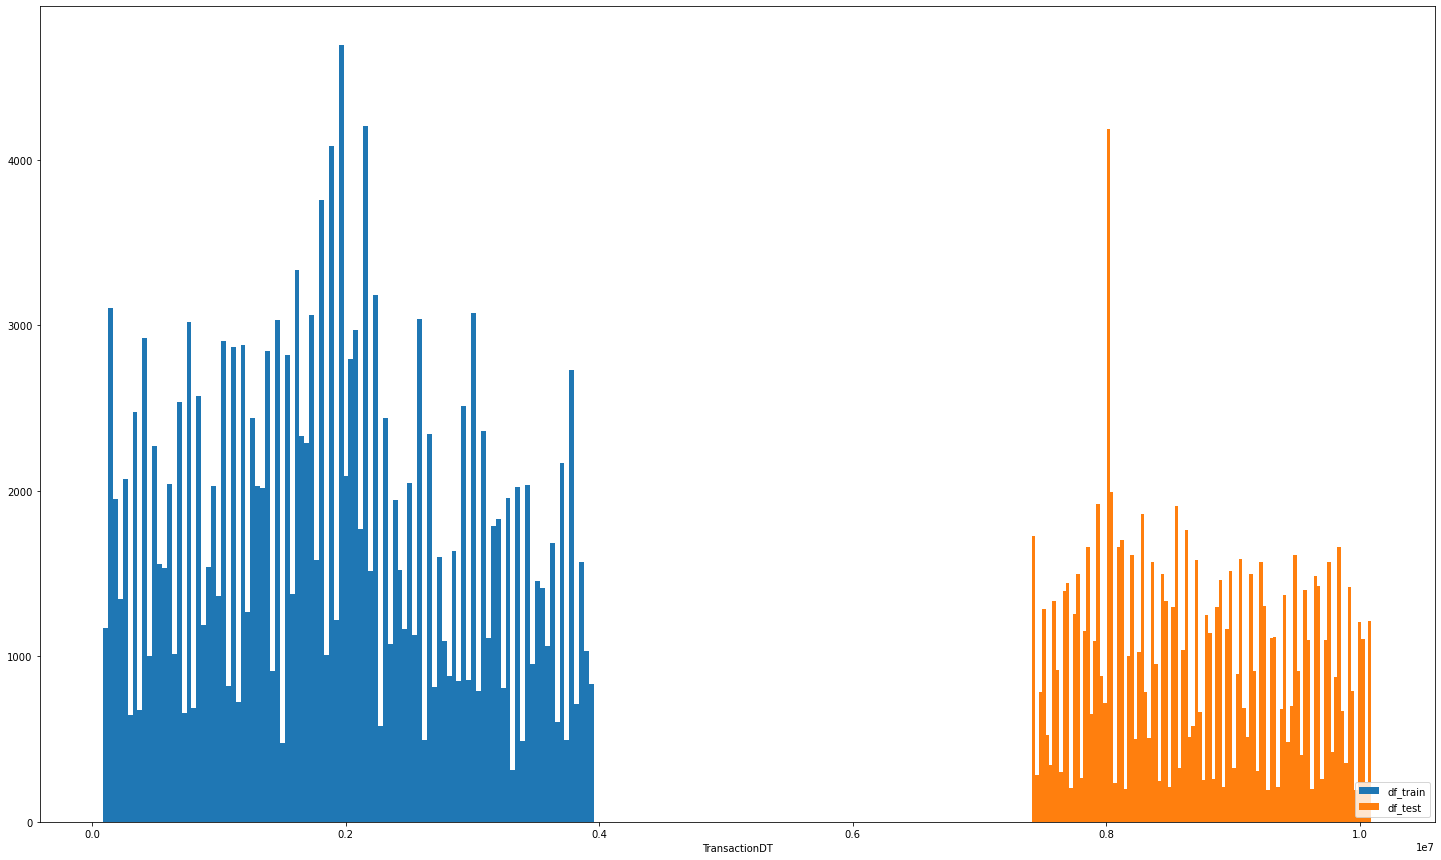

In [7]:
fig = plt.figure(figsize=(25, 15))

plt.hist(df_train['TransactionDT'], bins=100, label='df_train')
plt.hist(df_test['TransactionDT'], bins=100, label='df_test')

#df_train['TransactionAmt'].hist(bins=200, color="blue")

#plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('TransactionDT')
#plt.ylabel('TransactionDT')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Я не нашел описания датасета. Предполагаю, что TransactionDT и есть время.

Непонятный формат времени, хотелось бы знать чтобы разбить на дни недели, день, ночь. Это явно повысит точность предыдущих моделей.

Время раскидано по совершенно разным временным промежуткам, что скорее всего и сломало catboost, эту переменную нужно либо переделать и выкинуть исходную или просто выкинуть перед построением предыдущих моделей.

# Задание 2: построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

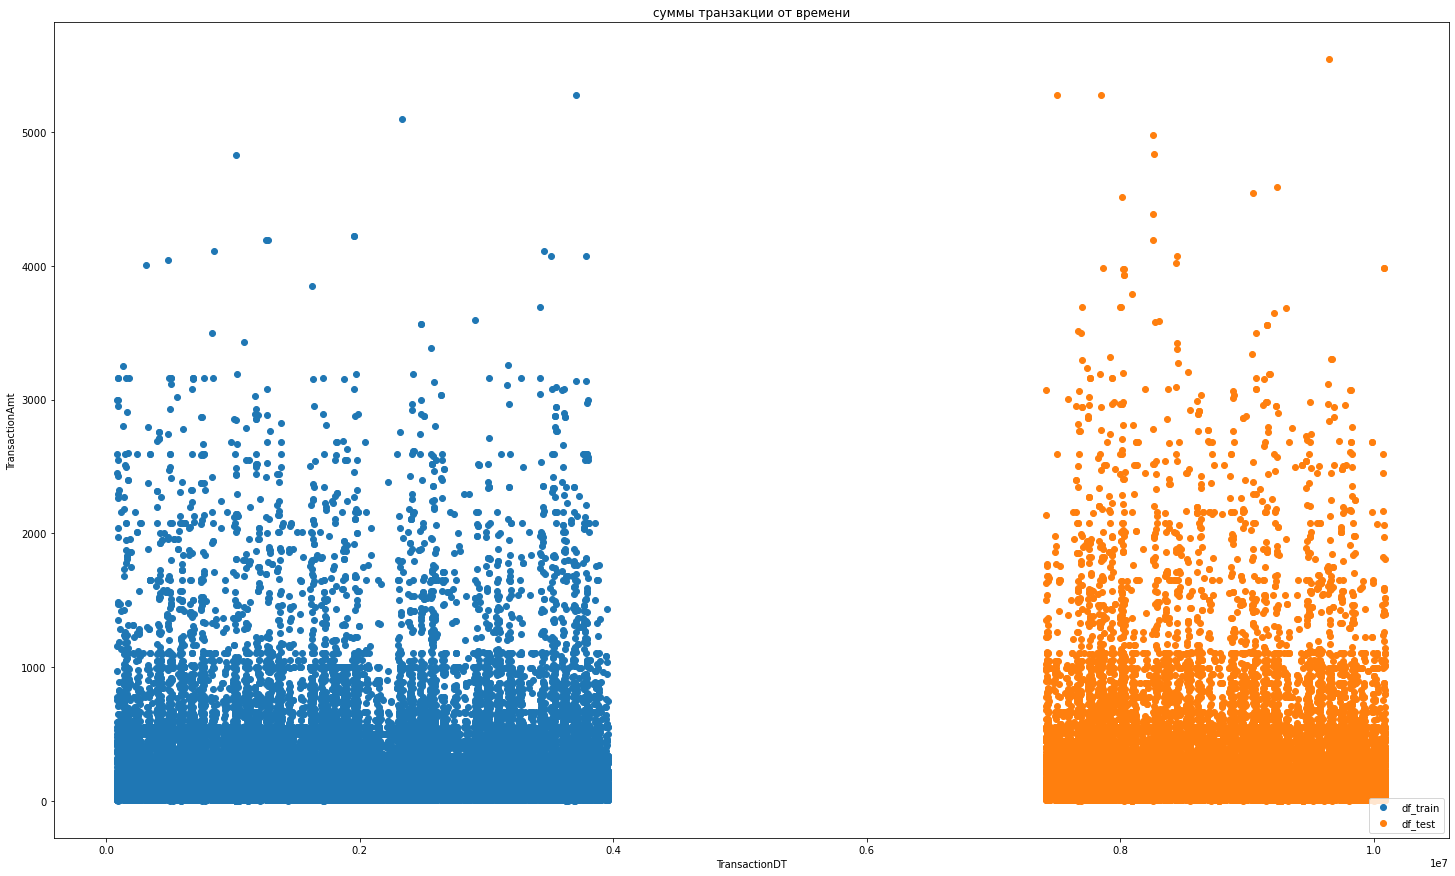

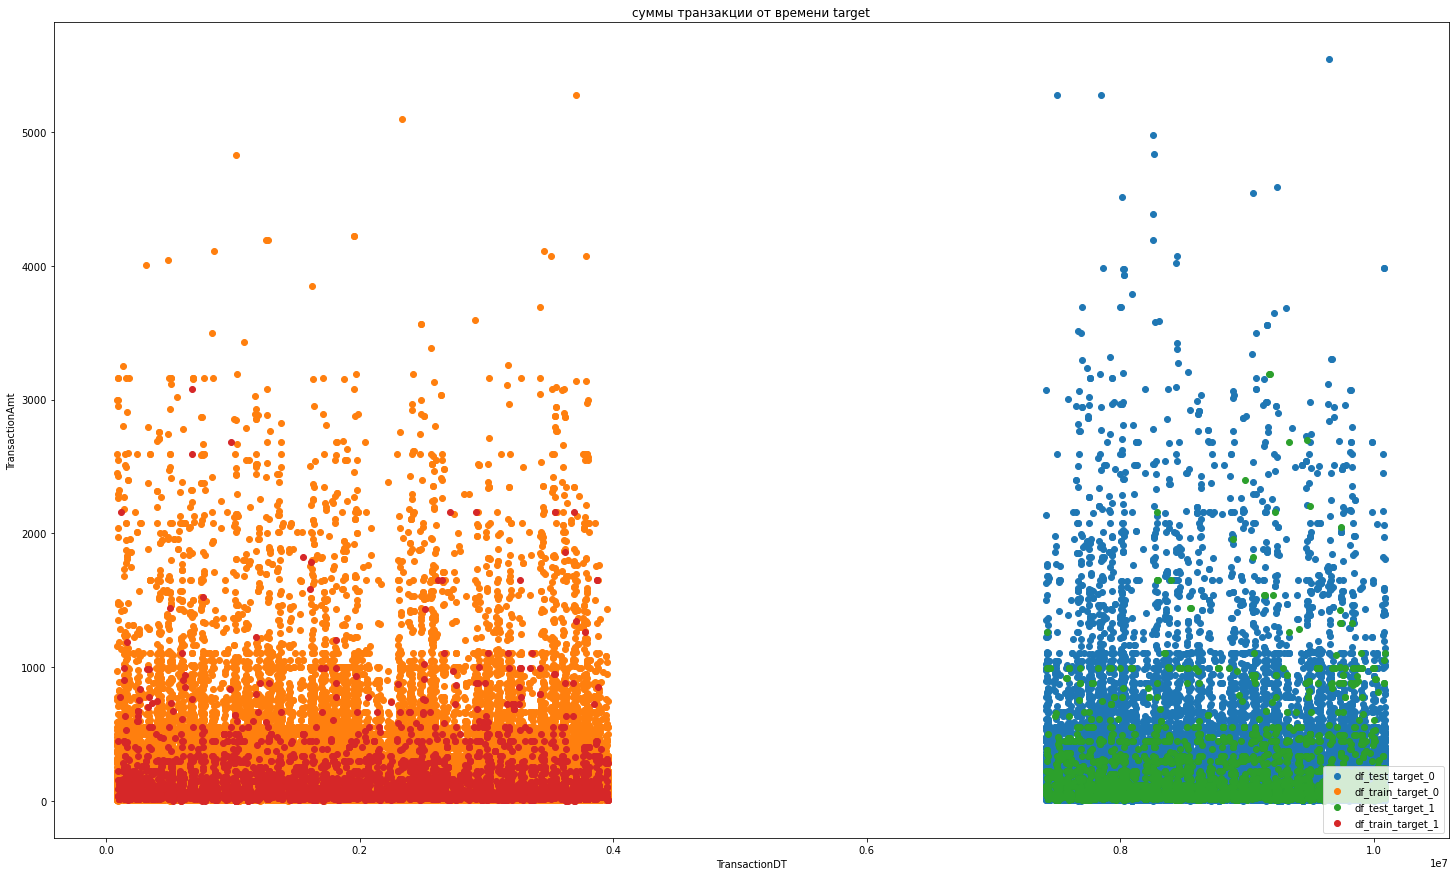

In [8]:
fig = plt.figure(figsize=(25, 15))

plt.scatter(df_train['TransactionDT'], df_train['TransactionAmt'], label='df_train')
plt.scatter(df_test['TransactionDT'], df_test['TransactionAmt'], label='df_test')


plt.xlabel('TransactionDT')
plt.ylabel('TransactionAmt')
plt.title('суммы транзакции от времени')
plt.legend(loc="lower right")
plt.show()


fig = plt.figure(figsize=(25, 15))

plt.scatter(df_test.loc[df_test['isFraud']==0]['TransactionDT'], 
            df_test.loc[df_test['isFraud']==0]['TransactionAmt'], 
            label='df_test_target_0')

plt.scatter(df_train.loc[df_train['isFraud']==0]['TransactionDT'], 
            df_train.loc[df_train['isFraud']==0]['TransactionAmt'], 
            label='df_train_target_0')

plt.scatter(df_test.loc[df_test['isFraud']==1]['TransactionDT'], 
            df_test.loc[df_test['isFraud']==1]['TransactionAmt'], 
            label='df_test_target_1')

plt.scatter(df_train.loc[df_train['isFraud']==1]['TransactionDT'], 
            df_train.loc[df_train['isFraud']==1]['TransactionAmt'], 
            label='df_train_target_1')


plt.title('суммы транзакции от времени target')
plt.xlabel('TransactionDT')
plt.ylabel('TransactionAmt')
plt.legend(loc="lower right")
plt.show()


Тырят небольшими суммами. До 1000

# Задание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

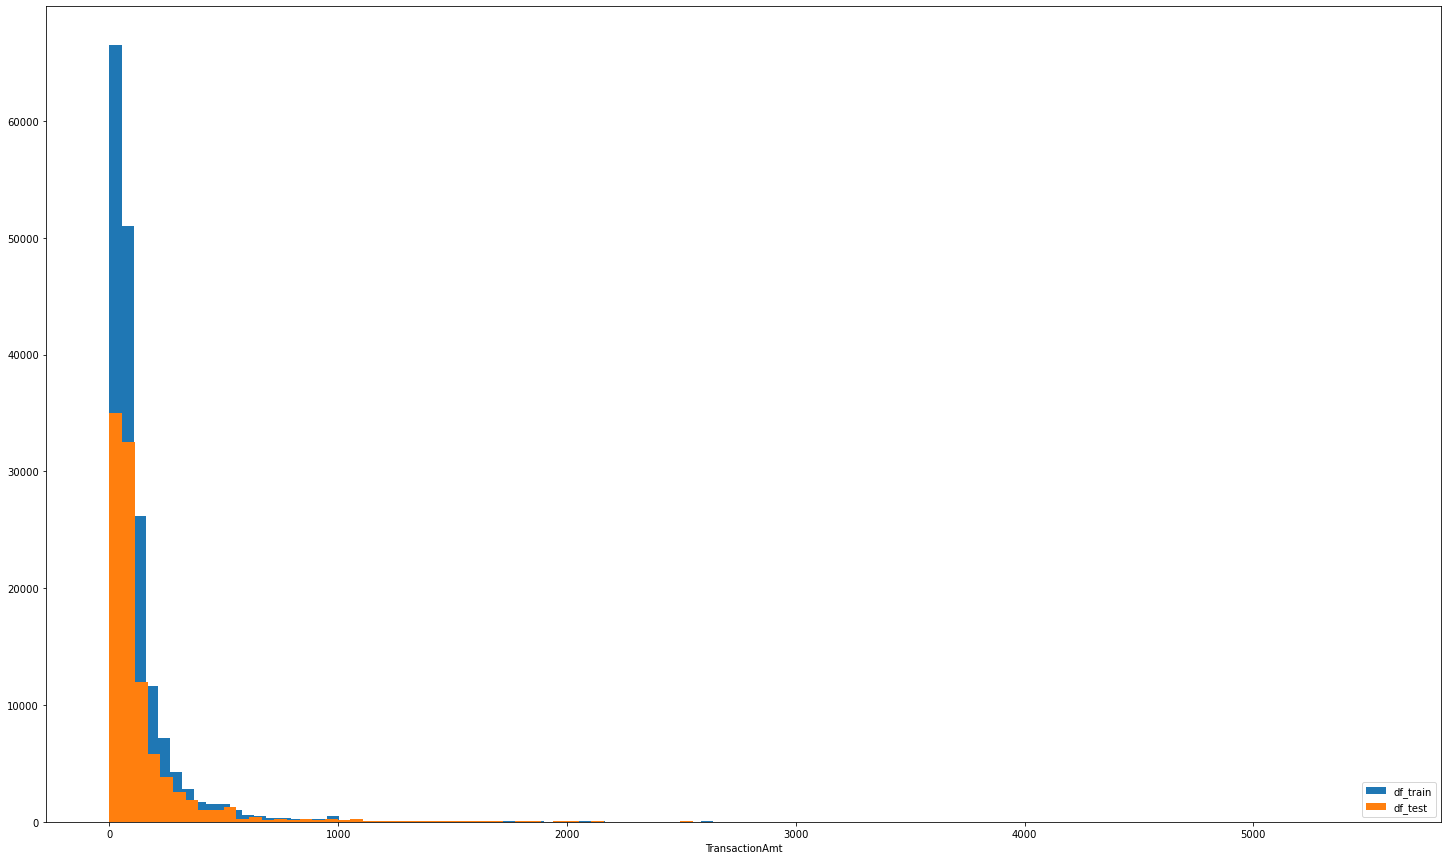

In [9]:
fig = plt.figure(figsize=(25, 15))

plt.hist(df_train['TransactionAmt'], bins=100, label='df_train')
plt.hist(df_test['TransactionAmt'], bins=100, label='df_test')

plt.xlabel('TransactionAmt')
#plt.ylabel('TransactionDT')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Распределение явно не нормальное.

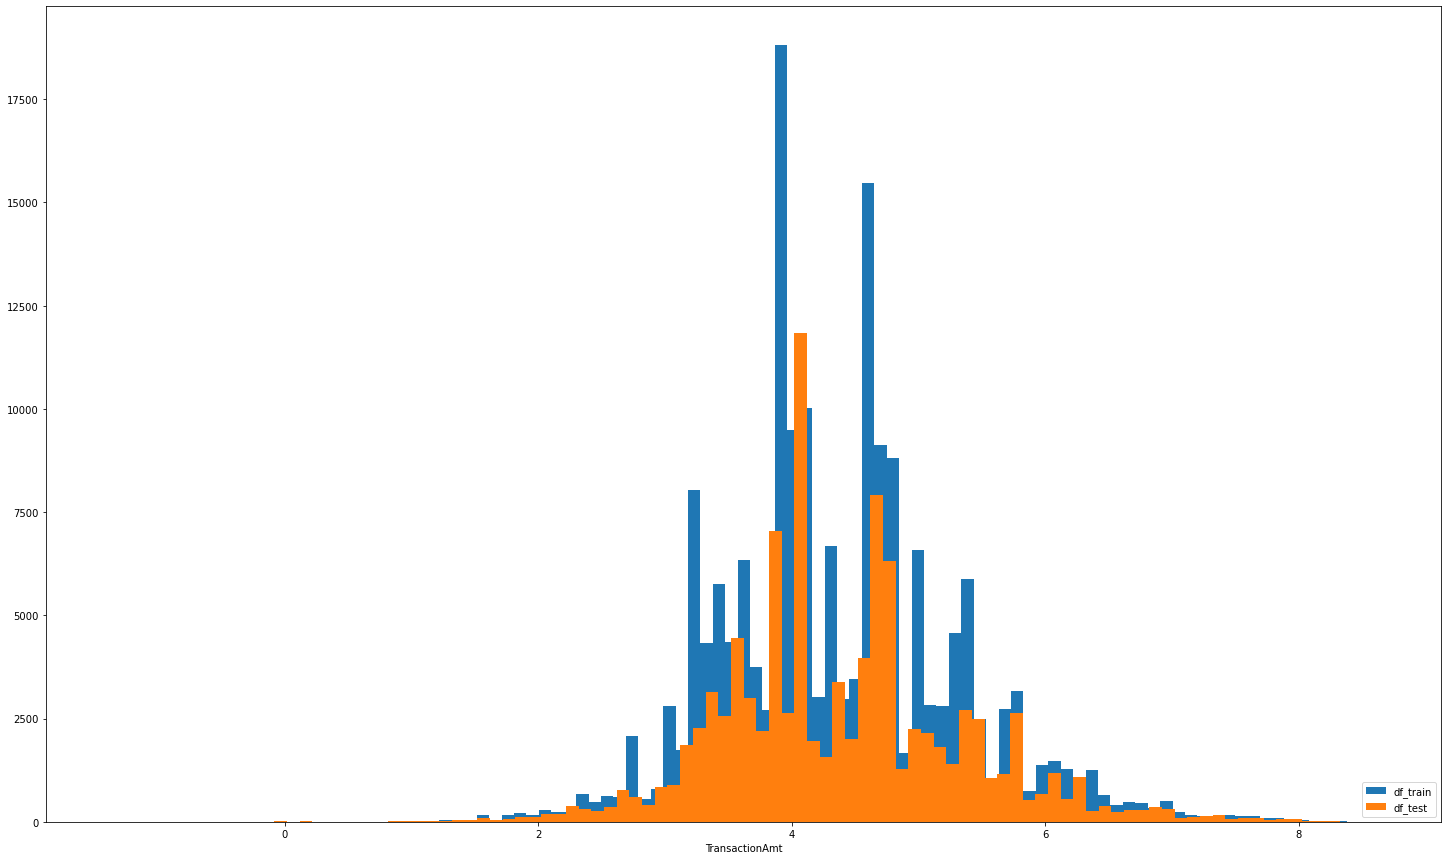

In [10]:
fig = plt.figure(figsize=(25, 15))

plt.hist(np.log(df_train['TransactionAmt']), bins=100, label='df_train')
plt.hist(np.log(df_test['TransactionAmt']), bins=100, label='df_test')

plt.xlabel('TransactionAmt')
#plt.ylabel('TransactionDT')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [11]:
from scipy.stats import ks_2samp

statistic, pvalue = ks_2samp(np.log(df_train['TransactionAmt'].sample(2000)), np.log(df_test['TransactionAmt'].sample(2000)))

print(statistic)

0.0475


In [12]:
statistic, pvalue = ks_2samp(df_train['TransactionAmt'].sample(2000), df_test['TransactionAmt'].sample(2000))

print(statistic)

0.061


тестовая и обучающая выборки одинаковы

# Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

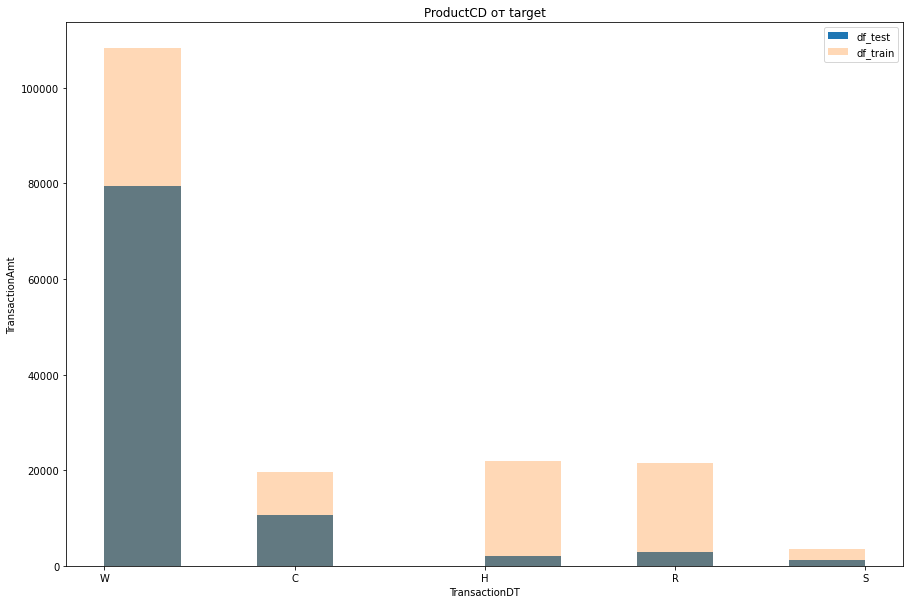

In [14]:

fig = plt.figure(figsize=(15, 10))

plt.hist(df_test.loc[df_test['isFraud']==0]['ProductCD'], 
            label='df_test')

plt.hist(df_train.loc[df_train['isFraud']==0]['ProductCD'],  
            label='df_train', alpha=0.3)

plt.title('ProductCD от target')
plt.xlabel('TransactionDT')
plt.ylabel('TransactionAmt')
plt.legend(loc="upper right")
plt.show()


card4, card6 нету